## Computational Modelling of Social Systesm SS24
### Final Project - Computational Modelling of Bank Runs

In [47]:
from mesa import Model, Agent
from mesa.time import SimultaneousActivation
import random


##### Define Class Agent

In [48]:
class GranovetterAgentBasic(Agent):
    
    def __init__(self, unique_id, engagement_threshold, model, withdrawal_amount):
        '''
         Create a new Granovetter agent.

         Args:
            unique_id: Unique identifier for the agent
            engagement_threshold: An agent's threshold for joining a bank run
            model: The model instance
            withdrawal_amount: The amount this agent will withdraw
        '''
        
        super().__init__(unique_id, model)
        self.unique_id = unique_id 
        self.engagement_threshold = engagement_threshold
        self.decision_reached = False
        self.engaged = False
        self.withdrawal_amount = withdrawal_amount #amount one agent can withdraw from the bank
    
    def step(self):
        '''
        Run one step of the agent.
        '''
        if self.engaged:
            return
        
        engaged_agents = [agent for agent in self.model.schedule.agents if agent.engaged]
        proportion_engaged = len(engaged_agents) / len(self.model.schedule.agents)
        
        if proportion_engaged >= self.engagement_threshold:
            self.decision_reached = True
            
    def advance(self):
        if self.engaged:
            return
        if self.decision_reached:
            self.engaged = True
            self.model.bank_assets -= self.withdrawal_amount # substract withdrawal from bank
            if self.model.bank_assets < 0: # if bank asssets smaller than 0, asset = zero
                self.model.bank_assets = 0

##### Define Class Model

In [49]:
class GranovetterModelBasic(Model):

    def __init__(self, N, mu, sigma, initial_bank_assets, mean_withdrawal, std_withdrawal):
        '''
        Create a new Granovetter model.

         Args:
            N: Number of agents in the model
            mu: Mean of the thresholds distribution
            sigma: Standard deviation of the thresholds distribution
            initial_bank_assets: Initial assets of the bank
            mean_withdrawal: Mean withdrawal amount per agent
            std_withdrawal: Standard deviation of the withdrawal amount
        '''
        
        super().__init__()
        self.agent_counter = N
        self.mu = mu
        self.sigma = sigma
        self.initial_bank_assets = initial_bank_assets #initial bank assets (can be given as parameter)
        self.bank_assets = initial_bank_assets # current bank assets
        self.running = True
        self.schedule = SimultaneousActivation(self)
        self.engaged = 0
        self.bank_failed = False
        
        for i in range(N):
            threshold = self.random.gauss(mu, sigma) #random threshold from gauss
            threshold = min(max(threshold, 0), 1) #should be between zero and one in case of higher/lower values from gauss
            withdrawal_amount = max(0, self.random.gauss(mean_withdrawal, std_withdrawal)) #gaussian withdrawal amount, max is not negative
            agent = GranovetterAgentBasic(i, threshold, self, withdrawal_amount) # creates an egent
            self.schedule.add(agent)

    def step(self):
        self.engaged = 0
        self.schedule.step()
        # stock if bank assets are Zero all all are engaged
        if self.bank_assets <= 0 or all(agent.engaged for agent in self.schedule.agents): 
            self.running = False

        if self.bank_assets <=0:
            self.bank_failed = True




##### Define Parameters and run Model

In [50]:
N = 100
mu = 0.1 #threshold
sigma = 0.1
initial_bank_assets = 10000000
mean_withdrawal = 100000
std_withdrawal = 1000


In [51]:
model = GranovetterModelBasic(N=N, mu=mu, sigma=sigma, 
                              initial_bank_assets=initial_bank_assets, 
                              mean_withdrawal=mean_withdrawal, 
                              std_withdrawal=std_withdrawal)

while model.running and model.schedule.steps < 100:
    model.step()
                            
print('The  Model ran for {} steps'.format(model.schedule.steps))

The  Model ran for 3 steps


##### analysis of sinlge model

In [52]:
engaged_agents_threshold = []
unengaged_agents_threshold = []
engaged_agents_money = []
unengaged_agents_money = []
engaged_agents_withdrawal = []
unengaged_agents_withdrawal = []

for agent in model.schedule.agents:
    if agent.engaged:
        engaged_agents_threshold.append(agent.engagement_threshold)
        engaged_agents_withdrawal.append(agent.withdrawal_amount)
    else:
        unengaged_agents_threshold.append(agent.engagement_threshold)
        unengaged_agents_withdrawal.append(agent.withdrawal_amount)

number_agents = len(engaged_agents_threshold) + len(unengaged_agents_threshold)
percentage_active = len(engaged_agents_threshold) / number_agents

print("Engaged Agents: " + str(len(engaged_agents_threshold)))
print("Unengaged Agents: " + str(len(unengaged_agents_threshold)))
print("Percentage Active: " + str(percentage_active))
print(30*"-")
print("Engaged Agents Thresholds sorted: " + str(sorted(engaged_agents_threshold)))
print("Unengaged Agents Thresholds sorted: " + str(sorted(unengaged_agents_threshold)))
print(30*"-")



print("Engaged Agents Withdrawal Amounts: " + str(sorted(engaged_agents_withdrawal)))
print("Unengaged Agents Withdrawal Amounts: " + str(sorted(unengaged_agents_withdrawal)))
print(30*"-")

print("Current Bank Assets: " + str(model.bank_assets))
print("Total money withdrawn: " + str(initial_bank_assets - model.bank_assets))
print("Bank Failure: " + str(model.bank_failed))
print(30*"-")

print("1.1: Percentage active " + str(percentage_active) + " is smaller than mu = " + str(mu))
print("1.2 Active agents are calculated using the lists of engaged and unengaged agents")


Engaged Agents: 100
Unengaged Agents: 0
Percentage Active: 1.0
------------------------------
Engaged Agents Thresholds sorted: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0.004678339022888417, 0.005249431217850625, 0.006494913766413701, 0.015255970284914502, 0.016657373307456425, 0.016713779385877134, 0.01950729042813397, 0.0199216345746748, 0.02967496487655119, 0.03146281286398053, 0.034498684272655816, 0.03500441667817106, 0.03696636616427561, 0.037660294444949206, 0.03848067395456788, 0.04271437620916303, 0.054344259614525076, 0.058408358997887426, 0.05844187516409506, 0.058777447927123624, 0.05932822685847711, 0.06124435387662708, 0.06456359323518251, 0.06853608074016816, 0.07183992444661197, 0.07354970364404473, 0.07478621949253028, 0.07789451341680508, 0.07869345691283641, 0.07945168945269335, 0.0813518855876114, 0.08494411354191496, 0.08589985321836618, 0.08806621237281481, 0.09069201566666517, 0.09071638830432191, 0.09154150113503617, 0.09326856691756877, 0.1026071552499633, 0.112173479835356

## run different parameters and visualize results

##### define function for model, takes different parameters for threshold, withdrawals, number iteration

In [53]:
import pandas as pd
import matplotlib.pyplot as plt

def run_model(N, mu, sigma, initial_bank_assets, mean_withdrawal, std_withdrawal, n_iter):

    #run the model as before
    model = GranovetterModelBasic(N, mu, sigma, initial_bank_assets, mean_withdrawal, std_withdrawal)
    
    #store bank assets over time
    bank_assets_over_time = []
    
    while model.running and model.schedule.steps < n_iter: # number of iterations n_iter can also be defined
        model.step()
        bank_assets_over_time.append(model.bank_assets)
    
    
    final_engaged_agents = len([agent for agent in model.schedule.agents if agent.engaged])
    return bank_assets_over_time, final_engaged_agents, model.schedule.steps,  model.bank_failed



##### define parameters 

In [56]:
# Define parameter sets
# n_iter = number of model iterations
# mu = threshold, sigma = std of gaussian random
# mean withdrawal and gaussian std of withdrawal 

# in this case i just played around with different thresholds

parameter_sets = [
    {'n_iter':10, 'N': 100, 'mu': 0.05, 'sigma': 0.1, 'initial_bank_assets': 10000000, 'mean_withdrawal': 100000, 'std_withdrawal': 1000 },
    {'n_iter':10, 'N': 100, 'mu': 0.10, 'sigma': 0.1, 'initial_bank_assets': 10000000, 'mean_withdrawal': 100000, 'std_withdrawal': 1000 },
    {'n_iter':10, 'N': 100, 'mu': 0.15, 'sigma': 0.1, 'initial_bank_assets': 10000000, 'mean_withdrawal': 100000, 'std_withdrawal': 1000 },
    {'n_iter':10, 'N': 100, 'mu': 0.17, 'sigma': 0.1, 'initial_bank_assets': 10000000, 'mean_withdrawal': 100000, 'std_withdrawal': 1000 },
    {'n_iter':10, 'N': 100, 'mu': 0.18, 'sigma': 0.1, 'initial_bank_assets': 10000000, 'mean_withdrawal': 100000, 'std_withdrawal': 1000 },
    {'n_iter':10, 'N': 100, 'mu': 0.19, 'sigma': 0.1, 'initial_bank_assets': 10000000, 'mean_withdrawal': 100000, 'std_withdrawal': 1000 },

    {'n_iter':10, 'N': 100, 'mu': 0.20, 'sigma': 0.1, 'initial_bank_assets': 10000000, 'mean_withdrawal': 100000, 'std_withdrawal': 1000 },
    {'n_iter':10, 'N': 100, 'mu': 0.22, 'sigma': 0.1, 'initial_bank_assets': 10000000, 'mean_withdrawal': 100000, 'std_withdrawal': 1000 },
    {'n_iter':10, 'N': 100, 'mu': 0.24, 'sigma': 0.1, 'initial_bank_assets': 10000000, 'mean_withdrawal': 100000, 'std_withdrawal': 1000 },

    # {'n_iter':10, 'N': 100, 'mu': 0.25, 'sigma': 0.1, 'initial_bank_assets': 10000000, 'mean_withdrawal': 100000, 'std_withdrawal': 1000 },
    # {'n_iter':10, 'N': 100, 'mu': 0.27, 'sigma': 0.1, 'initial_bank_assets': 10000000, 'mean_withdrawal': 100000, 'std_withdrawal': 1000 },

    # {'n_iter':10, 'N': 100, 'mu': 0.30, 'sigma': 0.1, 'initial_bank_assets': 10000000, 'mean_withdrawal': 100000, 'std_withdrawal': 1000 },
    # {'n_iter':10, 'N': 100, 'mu': 0.35, 'sigma': 0.1, 'initial_bank_assets': 10000000, 'mean_withdrawal': 100000, 'std_withdrawal': 1000 },
    # {'n_iter':10, 'N': 100, 'mu': 0.40, 'sigma': 0.1, 'initial_bank_assets': 10000000, 'mean_withdrawal': 100000, 'std_withdrawal': 1000 },
    # {'n_iter':10, 'N': 100, 'mu': 0.45, 'sigma': 0.1, 'initial_bank_assets': 10000000, 'mean_withdrawal': 100000, 'std_withdrawal': 1000 },
    # {'n_iter':10, 'N': 100, 'mu': 0.50, 'sigma': 0.1, 'initial_bank_assets': 10000000, 'mean_withdrawal': 100000, 'std_withdrawal': 1000 },
    # {'n_iter':10, 'N': 100, 'mu': 0.55, 'sigma': 0.1, 'initial_bank_assets': 10000000, 'mean_withdrawal': 100000, 'std_withdrawal': 1000 },


]

results = []

for params in parameter_sets:
    bank_assets_over_time, final_engaged_agents, steps, bank_failed = run_model(**params)
    results.append({
        'params': params,
        'bank_assets_over_time': bank_assets_over_time,
        'final_engaged_agents': final_engaged_agents,
        'steps': steps,
        'bank_failed' : bank_failed
    })


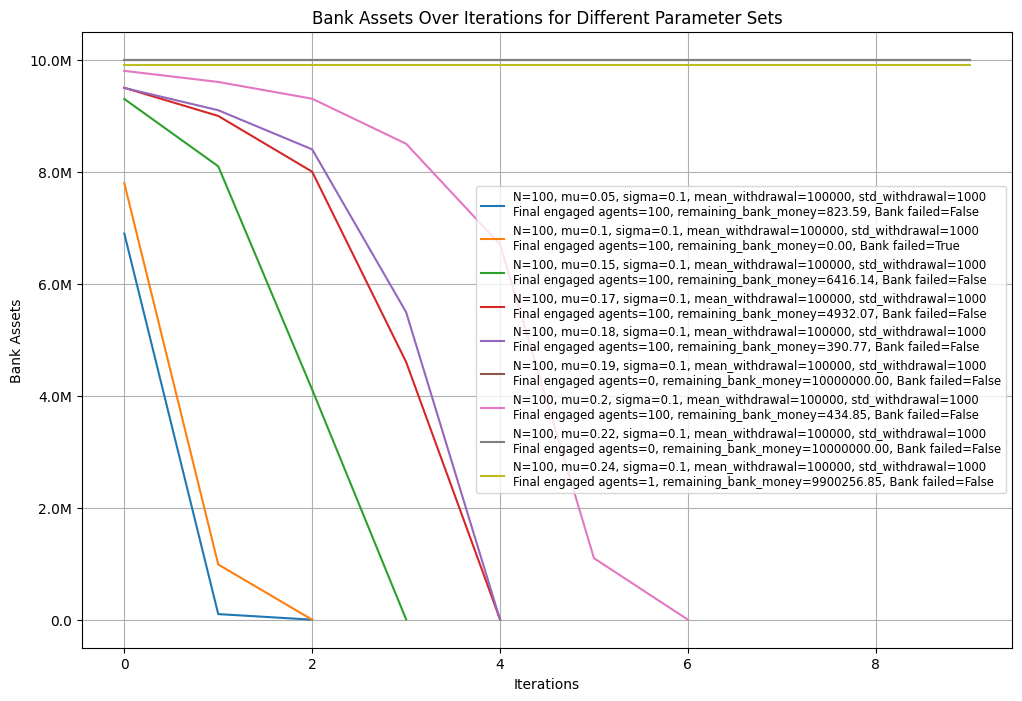

In [57]:
import matplotlib.ticker as mticker

plt.figure(figsize=(12, 8))

for result in results:
    params = result['params']
    bank_assets_over_time = result['bank_assets_over_time']
    bank_failed = result['bank_failed']
    label = (
        f"N={params['N']}, mu={params['mu']}, sigma={params['sigma']}, "
        f"mean_withdrawal={params['mean_withdrawal']}, std_withdrawal={params['std_withdrawal']}\n"
        f"Final engaged agents={result['final_engaged_agents']}, remaining_bank_money={result['bank_assets_over_time'][-1]:.2f}, Bank failed={bank_failed}"
    )
    plt.plot(bank_assets_over_time, label=label)

plt.xlabel('Iterations')
plt.ylabel('Bank Assets')
plt.title('Bank Assets Over Iterations for Different Parameter Sets')
plt.legend(loc='best', fontsize='small')
plt.grid(True)

# Format y-axis to show numbers in millions if necessary
ax = plt.gca()
formatter = mticker.FuncFormatter(lambda x, pos: f'{x/1e6:.1f}M' if x >= 1e6 else f'{x}')
ax.yaxis.set_major_formatter(formatter)

plt.show()